<h3> Sergio Andres Rios Gomez</h3>
<h4> Modelo Regresión Lineal.</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import os
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
ruta_archivo = '../data/processed/df_num_scaled.csv'
df = pd.read_csv(ruta_archivo)

In [3]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,1.032914,0.492364,1.834660,0.458714,0.854114
1,-0.843502,-0.639799,0.145989,-0.727344,-1.023087
2,-0.059185,-0.478110,0.030158,0.477043,-0.108754
3,0.892995,1.269889,-0.254601,-0.345968,0.795627
4,0.181486,0.594537,0.341790,0.762787,0.963967


<p> Separación de variables independientes y dependiente</p>

In [4]:
# Variables independientes (predictoras)
df_indep = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

# Variable dependiente (a predecir)
df_dep = df['Yearly Amount Spent']

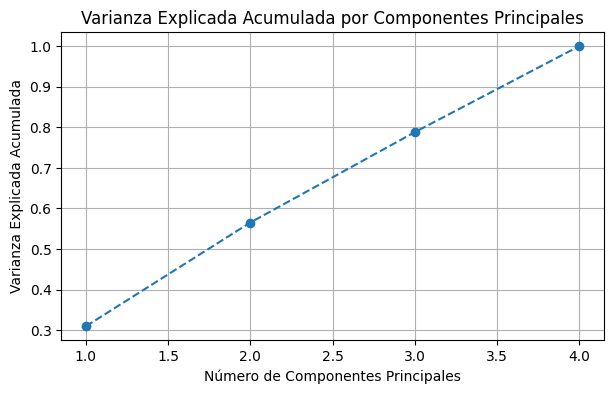

In [5]:
pca = PCA()
pca.fit(df_indep)

# 3. Visualizar la varianza explicada por cada componente
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

<p> Luego de correr el modelo PCA para identificar la cantidad de variables que mejor pueden explicar mi modelo, se llega a las conclusiones.</p>
<li> Con 1 componente principal, se conserva aproximadamente el 30% de la varianza. </li>
<li> Con 2 componentes principales, se conserva aproximadamente el 57% de la varianza. </li>
<li> Con 3 componentes principales, se conserva aproximadamente el 78% de la varianza. </li>
<li> Con 4 componentes principales, se conserva el 100% de la varianza.</li>
<li> Debido al tamaño del set de datos de las variables independientes, se decide trabajar con todas las variables </li>
<li> Dando respuesta a la pregunta ¿Cuál variable independiente tiene mayor impacto en tu variable dependiente?. Sin lugar a dudas la variable independiente que mayor impacto genera en la variable de salida es Length of Membership: Duración de la membresía </li>

In [6]:
# 1. Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_indep, df_dep, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Rendimiento del modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 0.010103908416906665
Coeficiente de Determinación (R²): 0.9778130629184126


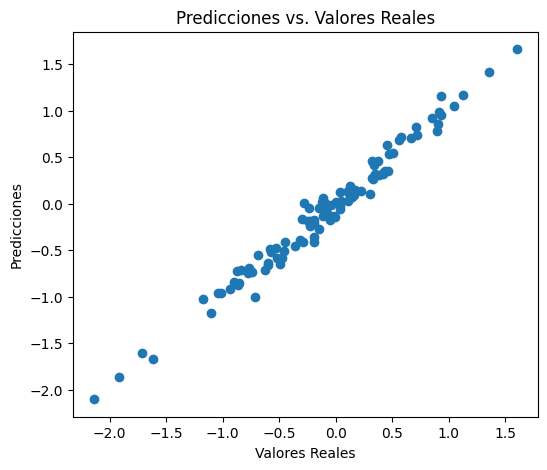

In [7]:
# 5. Visualizar las predicciones vs. valores reales (opcional)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(y_test, predicciones)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")
plt.show()

<p> MSE:  0.01010. Mide el error promedio al cuadrado entre las predicciones del modelo y los valores reales. MSE bajo indica que el modelo tiene un buen ajuste a los datos.</p>
<p> Coeficiente de Determinación: 0.977. El R² mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. En este caso, el R² es muy alto, lo que significa que el modelo explica el 97.78% de la varianza en la variable dependiente.</p>
<p> En resumen:

El modelo de regresión lineal tiene un excelente rendimiento, con un MSE muy bajo y un R² muy alto.
La gráfica confirma que las predicciones del modelo son muy precisas y se ajustan bien a los valores reales.
Los valores atípicos no afectan de manera significativa al modelo, por lo que se puede considerar un modelo optimo.<p>

<h3> Guardar el modelo entrenado.</h3>

In [8]:
# 1. Definir la ruta de la carpeta models
ruta_models = os.path.join(os.getcwd(), '..', 'models')

# 2. Crear la carpeta models si no existe
if not os.path.exists(ruta_models):
    os.makedirs(ruta_models)

# 3. Definir la ruta completa del archivo del modelo
ruta_archivo_modelo = os.path.join(ruta_models, 'modelo_entrenado.joblib')

# 4. Guardar el modelo en el archivo
joblib.dump(modelo, ruta_archivo_modelo)

print(f"Modelo guardado en para un uso posterior.")

Modelo guardado en para un uso posterior.


<p> Uso del modelo entrenado.</p>

In [9]:
ruta_archivo_modelo = os.path.join(os.getcwd(), '..', 'models', 'modelo_entrenado.joblib')

modelo_cargado = joblib.load(ruta_archivo_modelo)

print("Modelo cargado exitosamente.")

predicciones_cargadas = modelo_cargado.predict(X_test)
print(predicciones_cargadas[:50])

Modelo cargado exitosamente.
[-0.92088293  0.41855815 -0.69304603  0.02901915 -0.85562934  0.68121122
  0.3127901   0.06765935 -0.87061721 -0.24385818 -0.55335299 -0.71314167
 -0.71018046  0.27075129 -0.65219526 -0.72324965  0.73830611 -0.13648015
 -0.39423341 -0.16591092  0.02563625  0.13656391  0.08251017  1.41687958
 -0.47170568 -0.0251734   0.54948031  0.53606973 -0.95640442 -1.66595776
  0.32356052 -0.20290108  0.01800077 -1.85842377  0.06310438 -0.14737089
  0.19378239 -0.58625802 -0.40889569 -0.27094268 -0.04579978 -0.52008724
  0.09285899  0.01912336 -0.10104563  0.34957741  0.91771409  0.14103851
 -2.10201814 -0.63458756]
